# PyTF Example: STFT

In [1]:
import os, sys
path = os.path.realpath(os.path.join(os.getcwd(), '..'))
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt

from mu import core
from mu import time_frequency as tf

from mspacman.generator.noise import (white, pink) # I can't share this repository yet until my paper is published.
# So in order to make this example to work on your local machine, try generating your own test signal.

## Generate Signal

In [2]:
# Properties
tdur = 1
fs = 30000
nsamp = int(fs * tdur)

f = np.linspace(0, 100, nsamp)

# Generate a time domain signal
t = np.linspace(0, tdur, nsamp)
x = np.sin(f * 2 * np.pi * t)

amp = .5
noise = (white(nsamp, mean=0, std=amp) + pink(nsamp, mean=0, std=amp)).flatten()

xn = x + noise

# Convert generated signal to frequency domain
Xn = np.fft.rfft(xn, axis=-1)
w = np.fft.rfftfreq(xn.size) * fs

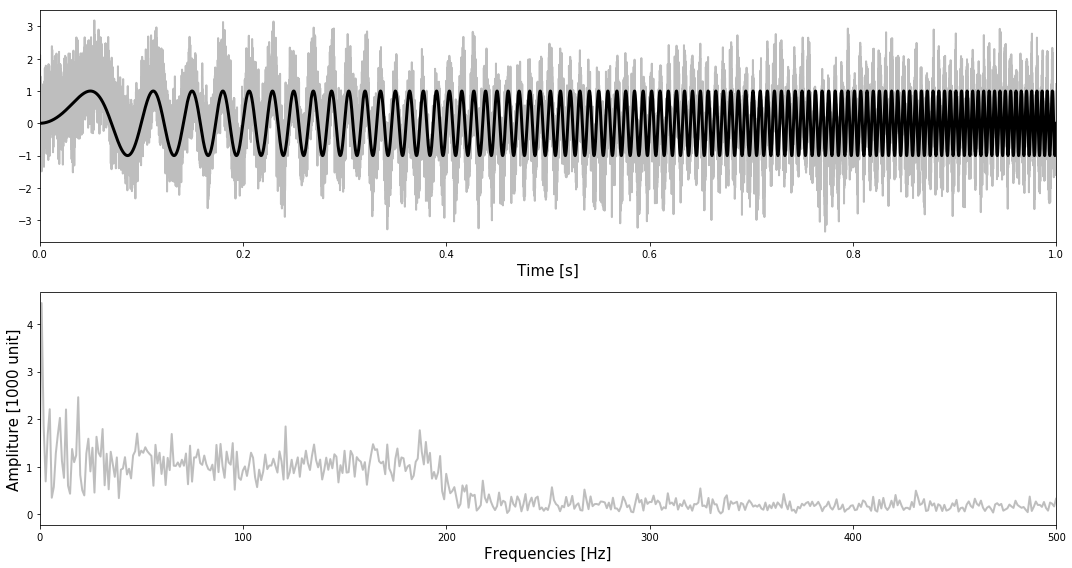

In [3]:
FONTSIZE = 15
figs, axs = plt.subplots(2, 1, figsize=(15, 8))

axs[0].plot(t, xn, c='C7', lw=2, alpha=.5)
axs[0].plot(t, x, c='k', lw=3)

axs[0].set_xlim([0, 1])
axs[0].set_xlabel('Time [s]', fontsize=FONTSIZE)


scale = 1E-3
axs[1].plot(w, np.abs(Xn) * scale, c='C7', lw=2, alpha=.5)
axs[1].set_xlim([0, 500])
axs[1].set_xlabel('Frequencies [Hz]', fontsize=FONTSIZE)
axs[1].set_ylabel('Ampliture [{} unit]'.format(int(1/scale)), fontsize=FONTSIZE)
plt.tight_layout()

## Short-Time Fourier Transform (STFT)

In [4]:
mode = 'full' # 'full' for ifft, otherwise irfft
# Properties
binsize = 2 ** 12
hopsize = binsize // 2

In [5]:
Xn_ = tf.stft.stft(xn, binsize=binsize, hopsize=hopsize, window='hanning', mode=mode)

Text(0, 0.5, 'Frequencies [Hz]')

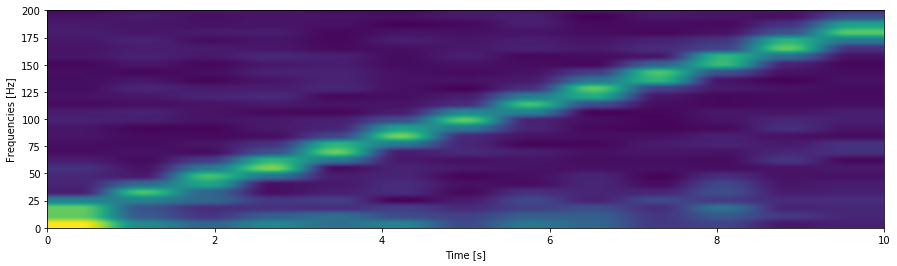

In [6]:
plt.figure(figsize=(15, 4))
plt.imshow(np.abs(Xn_)[0,:,:binsize//2].T,
           aspect='auto',
           origin='lower',
           interpolation='hanning',
           extent=[0, 10, 0, fs//2])
# plt.xlim([0, 5])
plt.ylim([0, 200])
plt.xlabel('Time [s]')
plt.ylabel('Frequencies [Hz]')

## Inverse STFT

In [7]:
xi_ = tf.stft.istft(Xn_, binsize=binsize, hopsize=hopsize, mode=mode, axis=-1)
t_ = np.arange(xi_.shape[-1]) / fs

Text(0.5, 0, 'Time [s]')

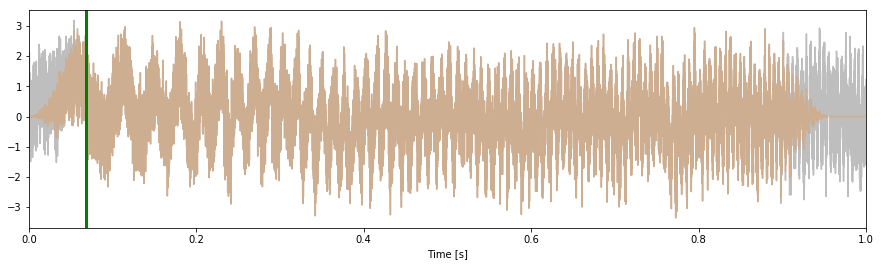

In [8]:
plt.figure(figsize=(15, 4))
plt.plot(t, xn, c='C7', alpha=.5)
plt.plot(t_, xi_[0,:].real, c='C1', alpha=.25)
plt.xlim([0, 1])
plt.axvline(x=(binsize//2)/fs, c='g', lw=3)
plt.xlabel('Time [s]')

## Let's Time It

In [9]:
# Full mode - fft/ifft
Xn_ = tf.stft.stft(xn, binsize=binsize, hopsize=hopsize, window='hanning', mode='full')
%timeit tf.stft.stft(xn, binsize=binsize, hopsize=hopsize, window='hanning', mode='full', axis=-1)
%timeit tf.stft.istft(Xn_, binsize=binsize, hopsize=hopsize, mode='full', axis=-1)

439 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
179 µs ± 947 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
# Half mode - rfft/irfft
Xn_ = tf.stft.stft(xn, binsize=binsize, hopsize=hopsize, window='hanning', mode=None)
%timeit tf.stft.stft(xn, binsize=binsize, hopsize=hopsize, window='hanning', axis=-1)
%timeit tf.stft.istft(Xn_, binsize=binsize, hopsize=hopsize, axis=-1)

247 µs ± 6.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
137 µs ± 491 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
